In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import sqlite3
# Conectar a la base de datos usando ruta relativa
conn = sqlite3.connect("../proyectomacro.db")  # Subir un nivel para encontrar el archivo
cursor = conn.cursor()

# Verificar conexión (listar tablas)
df=pd.read_sql_query("SELECT año, pib_real_base_1990 FROM PIB_Real_Gasto",conn)

conn.close()
df

,año,pib_real_base_1990
0,1950,5636077.0
1,1951,6046487.0
2,1952,6276994.0
3,1953,5656047.0
4,1954,5784163.0
...,...,...
69,2019,49256933.0
70,2020,44952919.0
71,2021,47697656.0
72,2022,49482450.0


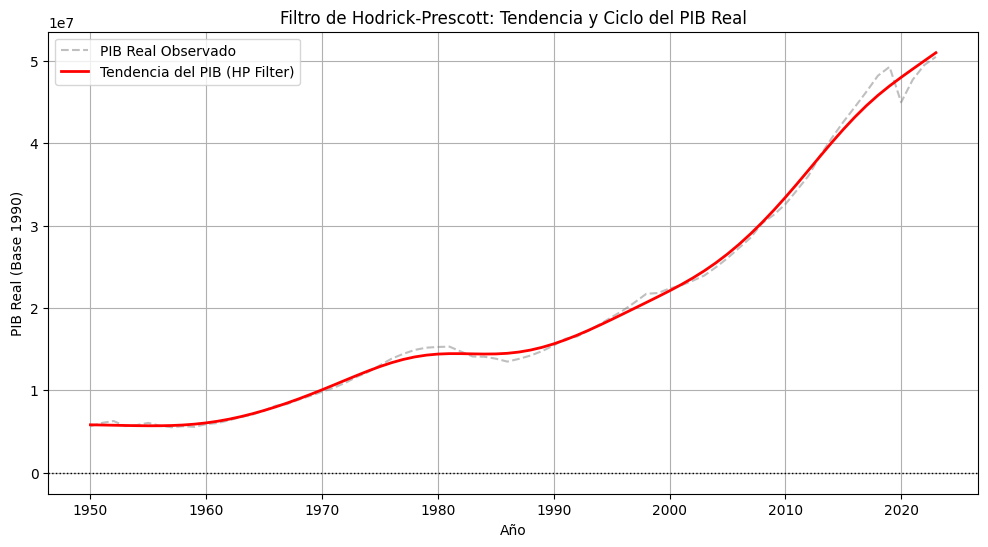

In [6]:
# Aplicar el filtro de Hodrick-Prescott al PIB real
ciclo_pib, tendencia_pib = hpfilter(df["pib_real_base_1990"], lamb=100)  # Lambda recomendado para datos anuales

# Agregar las columnas de tendencia y ciclo al DataFrame
df["Tendencia"] = tendencia_pib
df["Ciclo"] = ciclo_pib

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df["año"], df["pib_real_base_1990"], label="PIB Real Observado", color="gray", alpha=0.5, linestyle='--')
plt.plot(df["año"], df["Tendencia"], label="Tendencia del PIB (HP Filter)", color="red", linewidth=2)
plt.axhline(0, color="black", linestyle="dotted", linewidth=1)
plt.xlabel("Año")
plt.ylabel("PIB Real (Base 1990)")
plt.title("Filtro de Hodrick-Prescott: Tendencia y Ciclo del PIB Real")
plt.legend()
plt.grid(True)
plt.show()

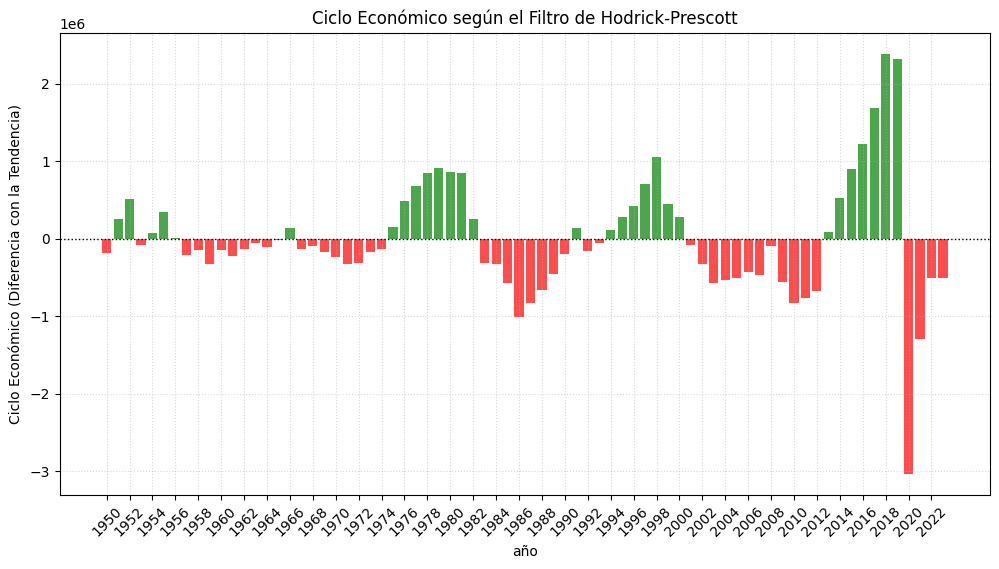

In [13]:
# Graficar el ciclo económico (PIB observado - Tendencia)
plt.figure(figsize=(12, 6))
plt.bar(df["año"], df["Ciclo"], color=["red" if c < 0 else "green" for c in df["Ciclo"]], alpha=0.7)
plt.axhline(0, color="black", linestyle="dotted", linewidth=1)  # Línea base en 0
plt.xlabel("año")
plt.ylabel("Ciclo Económico (Diferencia con la Tendencia)")
plt.title("Ciclo Económico según el Filtro de Hodrick-Prescott")
plt.grid(linestyle="dotted", alpha=0.5)
plt.xticks(df['año'][::2], rotation=45)
plt.show()